In [124]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

from matplotlib import rcParams
rcParams['font.family'] = 'New Gulim'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

# Train 데이터 확인

In [125]:
train_df = pd.read_csv('train.csv')
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [126]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [127]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## 데이터 타입 확인

범주형: season, holiday, workingday, weather

수치형: temp, atemp, humidity, windspeed, casual, registered, count

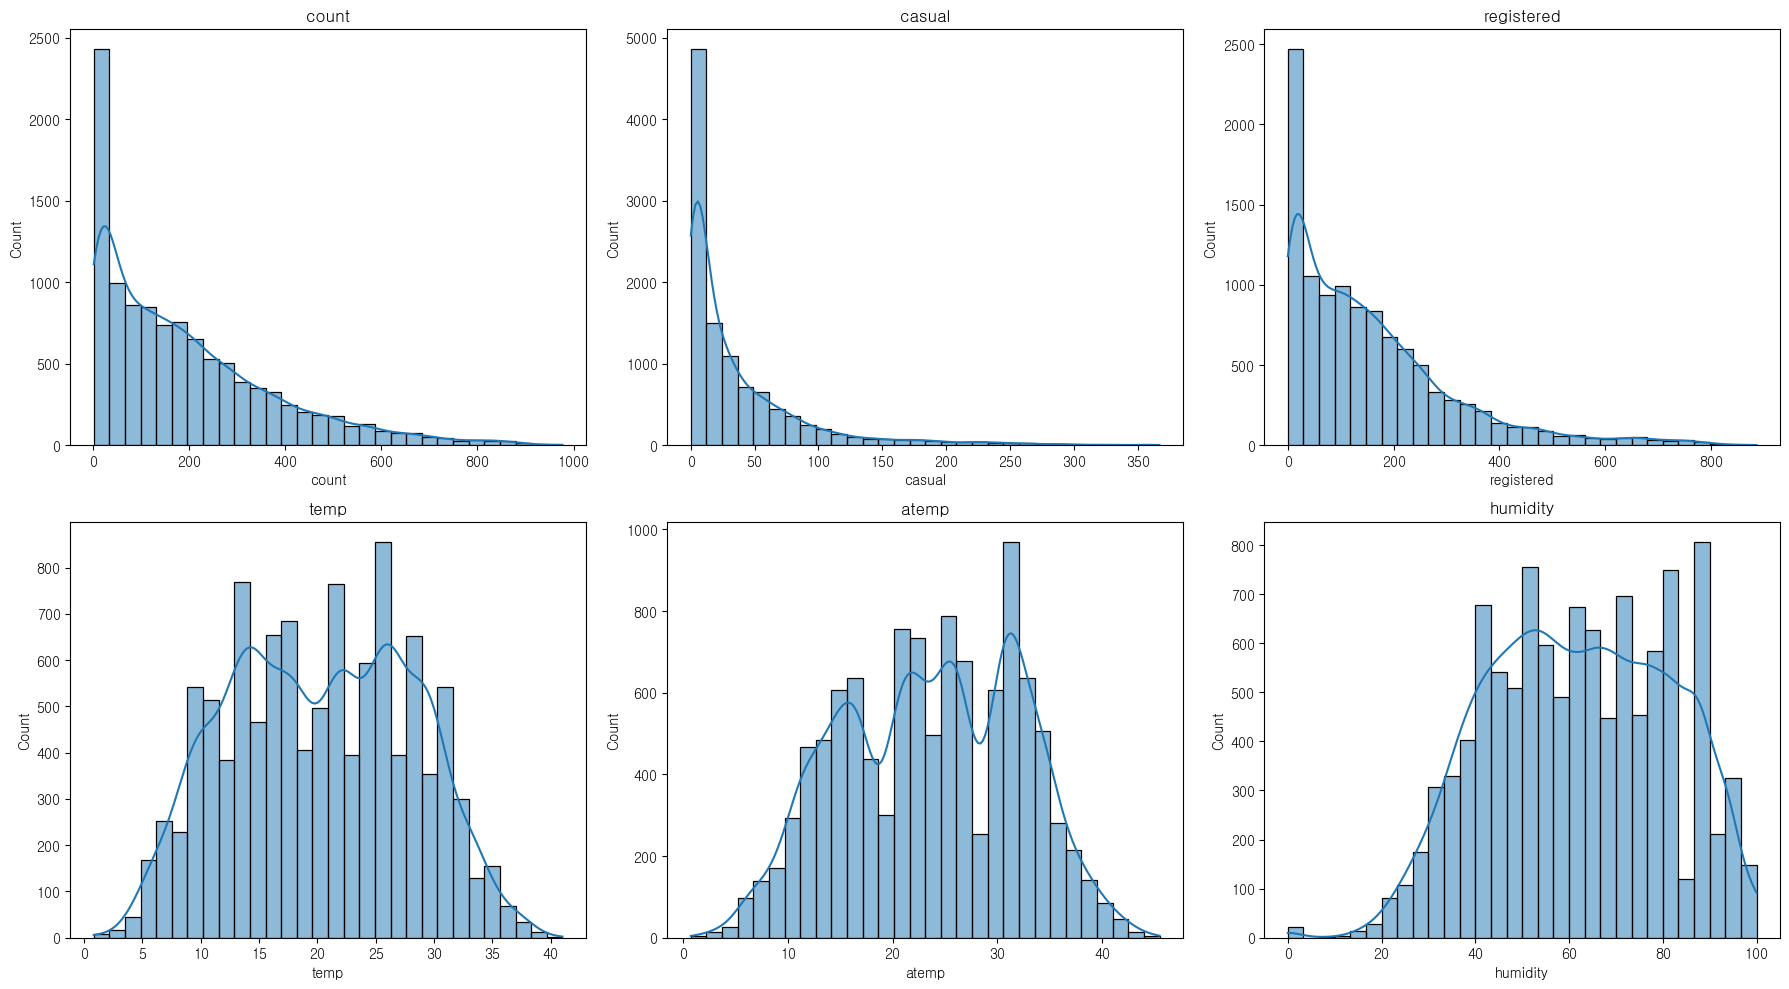

In [128]:
import seaborn as sns

features = ['count', 'casual', 'registered', 'temp', 'atemp', 'humidity']
plt.figure(figsize=(18, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(train_df[col], kde=True, bins=30)
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

'datetime' 컬럼을 이용하여 년, 월, 일, 시, 분, 초 생성

In [129]:
train_df['date'] = train_df['datetime'].apply(lambda x: x.split()[0])

train_df['year'] = train_df['datetime'].apply(lambda x: x.split()[0].split('-')[0]) 
train_df['month'] = train_df['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train_df['day'] = train_df['datetime'].apply(lambda x: x.split()[0].split('-')[2]) 
train_df['hour'] = train_df['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train_df['minute'] = train_df['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train_df['second'] = train_df['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [130]:
from datetime import datetime
import calendar

train_df['weekday'] = train_df['date'].apply(
    lambda dateString: 
    calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

train_df['season'] = train_df['season'].map({1: 'Spring', 
                                       2: 'Summer', 
                                       3: 'Fall', 
                                       4: 'Winter' })
train_df['weather'] = train_df['weather'].map({1: 'Clear', 
                                         2: 'Mist, Few clouds', 
                                         3: 'Light Snow, Rain, Thunder', 
                                         4: 'Heavy Snow, Rain, Thunder'})

시각화를 위해 문자로 변경해줌

In [131]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


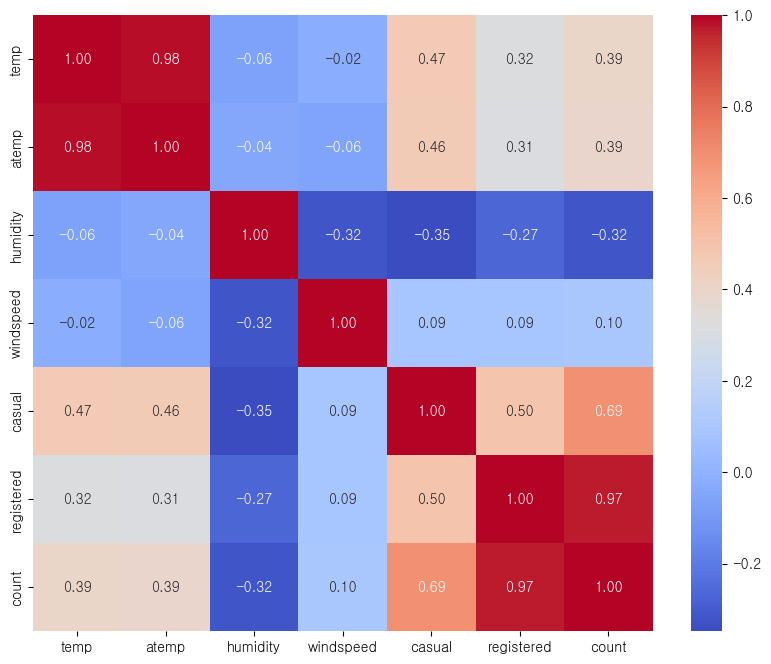

In [132]:
corr = train_df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

상관관계 확인

- temp 와 atemp는 거의 동일

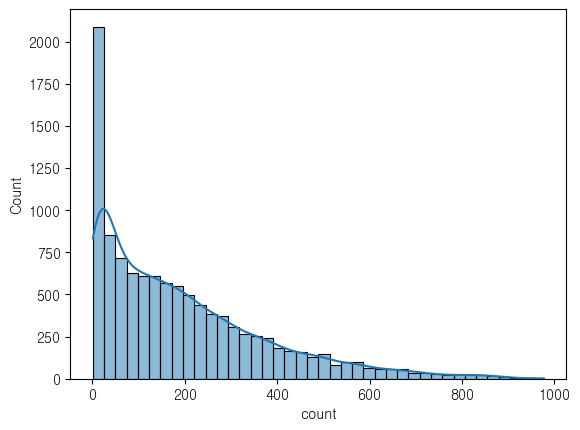

In [133]:
sns.histplot(train_df['count'], kde=True, bins=40)
plt.show()

타겟값인 count의 분포가 오른쪽으로 긴 꼬리를 형성하고  있음

오른쪽 꼬리 = 소수의 큰 값들이 전체 분포를 지배

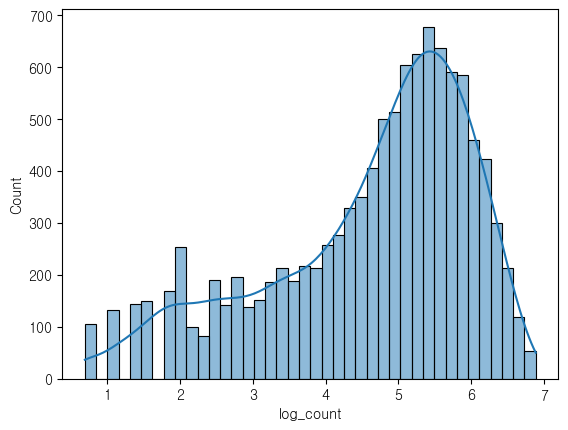

In [134]:
train_df['log_count'] = np.log1p(train_df['count'])

sns.histplot(train_df['log_count'], kde=True, bins=40)
plt.show()

오른쪽으로 긴 꼬리 분포 → 로그 변환(log1p)을 하면:

데이터가 정규분포에 가까워지고 극단적인 큰 값의 영향이 줄어들고
모델이 더 안정적이고 일반화 잘 되게 학습할 수 있음.



In [135]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  date        10886 non-null  object 
 13  year        10886 non-null  object 
 14  month       10886 non-null  object 
 15  day         10886 non-null  object 
 16  hour        10886 non-null  object 
 17  minute      10886 non-null  object 
 18  second      10886 non-null  object 
 19  weekday     10886 non-nul

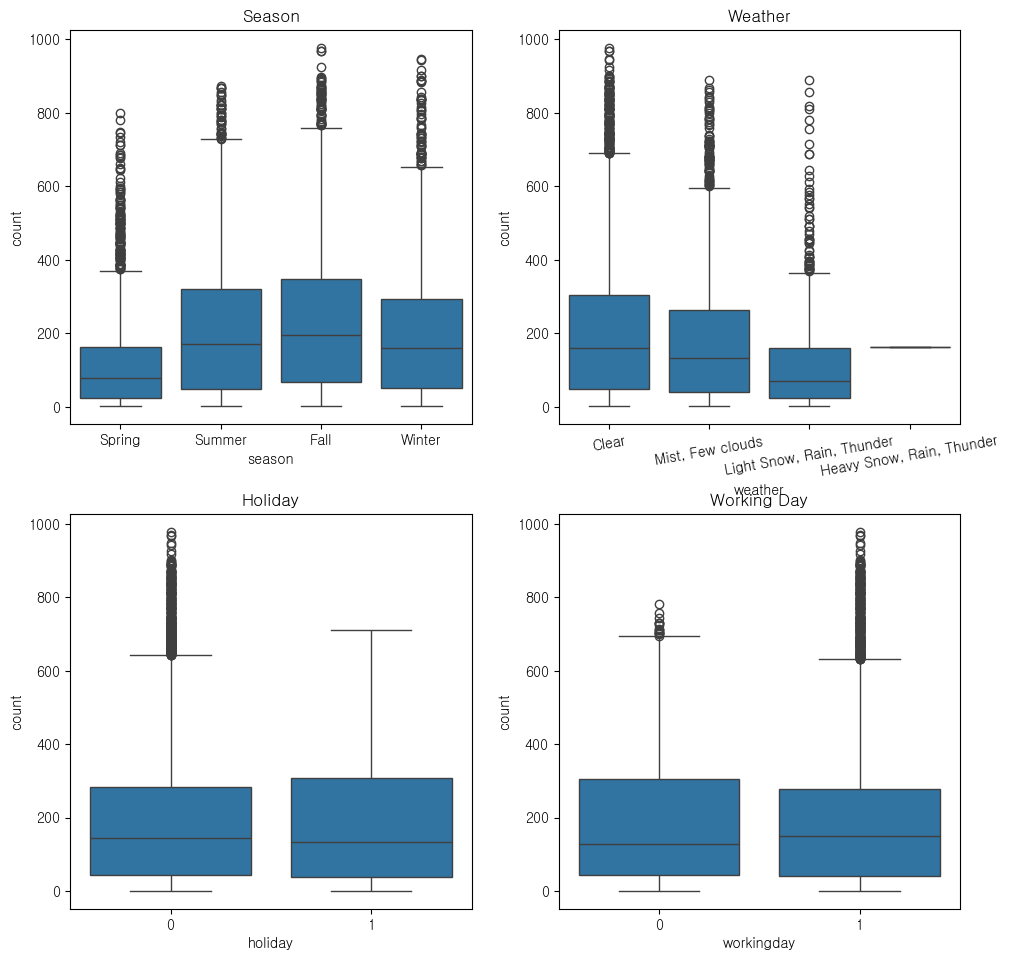

In [136]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10, 10)

sns.boxplot(x='season', y='count', data=train_df, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train_df, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train_df, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train_df, ax=axes[1, 1])

axes[0, 0].set(title='Season')
axes[0, 1].set(title='Weather')
axes[1, 0].set(title='Holiday')
axes[1, 1].set(title='Working Day')

axes[0, 1].tick_params('x', labelrotation=10)

Spring(봄)은 전체적으로 대여 수가 낮은 편이며 최소값과 중앙값 모두 가장 낮음.

Summer(여름)과 Fall(가을)은 대여량이 가장 높고 중앙값도 높음.

Winter(겨울)은 중앙값이 봄보다 높지만 이상치(outlier)도 많고 전체 분포는 낮아지는 경향.

Clear(맑음)일 때 대여량이 가장 높고, 분포도 넓음.

Mist/Few clouds(흐림/약간 흐림)에서도 꽤 높은 대여량을 보임.

Light Snow/Rain/Thunder에서는 대여량이 급감하며 중앙값도 낮음.

Heavy Snow/Rain/Thunder는 거의 대여량이 없음 -> 극단적 조건에서 이용 거의 없음

근무일에는 출퇴근 등으로 자전거 대여량이 더 높게 나타나는 경향이 있음.   
-> workingday는 의미 있는 피처가 될 수 있음.

# 데이터 전처리

In [137]:
train_df = pd.read_csv('train.csv')
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [138]:
# 날짜 생성
train_df['date'] = train_df['datetime'].apply(lambda x: x.split()[0])
# 연도 생성
train_df['year'] = train_df['datetime'].apply(lambda x: x.split()[0].split('-')[0])
# 월 생성
train_df['month'] = train_df['datetime'].apply(lambda x: x.split()[0].split('-')[1])
# 시 생성
train_df['hour'] = train_df['datetime'].apply(lambda x: x.split()[1].split(':')[0])
# 요일 생성
train_df["weekday"] = train_df['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())

In [139]:
train_df['log_count'] = np.log1p(train_df['count'])

In [140]:
train_df = train_df.drop(columns=['datetime', 'casual', 'registered', 'count', 'date', 'month', 'windspeed'])

- 'datetime' 은 파생변수를 만들어 뒀기 때문에 drop
- 'casual', 'registered'  => count = casual + registered
- 'date', 'month' => 요일과 계절이 나뉘어져 있기 때문에 drop
- 'windspeed' => 상관계수 낮음

In [141]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   year        10886 non-null  object 
 8   hour        10886 non-null  object 
 9   weekday     10886 non-null  int64  
 10  log_count   10886 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 935.6+ KB


In [142]:
X = train_df.drop(columns=['log_count'])
y = train_df['log_count']

In [143]:
X = pd.get_dummies(X, columns=['season', 'holiday', 'workingday', 'weather', 'hour', 'weekday'], drop_first=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[['temp', 'atemp', 'humidity']] = scaler.fit_transform(X[['temp', 'atemp', 'humidity']])

# 모델 비교

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred_log = lr.predict(X_test)
lr_pred = np.expm1(lr_pred_log)
lr_true = np.expm1(y_test)

lr_rmse = np.sqrt(mean_squared_error(lr_true, lr_pred))
lr_r2 = r2_score(lr_true, lr_pred)

print(f'RMSE: {lr_rmse}')
print(f'R2: {lr_r2}')

RMSE: 96.94402462353092
R2: 0.7152676047047737


In [146]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [147]:
results = []

for degree in range(1, 4):
    lr_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linear', LinearRegression())
    ])
    lr_poly.fit(X_train, y_train)
    pred_poly_log =lr_poly.predict(X_test)
    pred_poly_log = np.clip(pred_poly_log, a_min=None, a_max=10)
    lr_poly_pred = np.expm1(pred_poly_log)
    lr_poly_true = np.expm1(y_test)
    mse = mean_squared_error(lr_poly_true, lr_poly_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(lr_poly_true, lr_poly_pred)

    results.append({'degree':degree, 'MSE':mse, 'RMSE':rmse, 'R2':r2})

pd.DataFrame(results)

,degree,MSE,RMSE,R2
0,1,9.398144e+03,96.944025,0.715268
1,2,2.209537e+03,47.005717,0.933058
2,3,8.096822e+06,2845.491492,-244.306679


In [148]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

def rmse_count(y_true_log, y_pred_log):
    y_true = np.expm1(y_true_log) 
    y_pred = np.expm1(np.clip(y_pred_log, 0, 10)) 
    return np.sqrt(mean_squared_error(y_true, y_pred))

def r2_count(y_true_log, y_pred_log):
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(np.clip(y_pred_log, 0, 10))
    return r2_score(y_true, y_pred)

def evaluate_model(model, name, X, y_log, test_size=0.2, cv=5):
    X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=test_size, random_state=42)

    model.fit(X_train, y_train)

    pred_test_log = model.predict(X_test)
    pred_test_log = np.clip(pred_test_log, 0, 10)
    pred_test = np.expm1(pred_test_log)
    true_test = np.expm1(y_test)

    test_rmse = np.sqrt(mean_squared_error(true_test, pred_test))
    test_r2 = r2_score(true_test, pred_test)

    rmse_scorer = make_scorer(rmse_count, greater_is_better=False)
    r2_scorer = make_scorer(r2_count)

    cv_rmse_scores = -cross_val_score(model, X_train, y_train, cv=cv, scoring=rmse_scorer)
    cv_r2_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2_scorer)

    cv_rmse_mean = cv_rmse_scores.mean()
    cv_r2_mean = cv_r2_scores.mean()

    print(f"\n[{name}] 평가 결과")
    print(f"Test RMSE: {test_rmse:.4f}, R2: {test_r2:.4f}")
    print(f"CV-{cv} RMSE: {cv_rmse_mean:.4f}")
    print(f"CV-{cv} R2  : {cv_r2_mean:.4f}")

    return {
        'Model': name,
        'Test_RMSE': test_rmse,
        'Test_R2': test_r2,
        'CV_RMSE': cv_rmse_mean,
        'CV_R2': cv_r2_mean,
    }
    

In [149]:
model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression()),
])

model_poly.fit(X_train, y_train)

poly_pred_log = model_poly.predict(X_test)

poly_pred = np.expm1(poly_pred_log)
poly_true = np.expm1(y_test)

poly_mse = mean_squared_error(poly_true, poly_pred)
poly_rmse = np.sqrt(poly_mse)
poly_r2 = r2_score(poly_true, poly_pred)

evaluate_model(model_poly, 'Linear_Poly', X, y)


[Linear_Poly] 평가 결과
Test RMSE: 47.0057, R2: 0.9331
CV-5 RMSE: 48.6829
CV-5 R2  : 0.9273


{'Model': 'Linear_Poly',
 'Test_RMSE': np.float64(47.00571692667621),
 'Test_R2': np.float64(0.9330583901266848),
 'CV_RMSE': np.float64(48.68293235765579),
 'CV_R2': np.float64(0.9273257740215481)}

In [150]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42)
evaluate_model(model_rf, "RandomForest", X, y)


[RandomForest] 평가 결과
Test RMSE: 60.3718, R2: 0.8896
CV-5 RMSE: 66.5023
CV-5 R2  : 0.8646


{'Model': 'RandomForest',
 'Test_RMSE': np.float64(60.37183388290723),
 'Test_R2': np.float64(0.889575986656606),
 'CV_RMSE': np.float64(66.50229780406367),
 'CV_R2': np.float64(0.8645756963399815)}

In [151]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor(random_state=42)
evaluate_model(model_gbr, "GradientBoosting", X, y)


[GradientBoosting] 평가 결과
Test RMSE: 92.4181, R2: 0.7412
CV-5 RMSE: 92.9320
CV-5 R2  : 0.7359


{'Model': 'GradientBoosting',
 'Test_RMSE': np.float64(92.41808093762926),
 'Test_R2': np.float64(0.741233123876804),
 'CV_RMSE': np.float64(92.93200210207124),
 'CV_R2': np.float64(0.7359312057629226)}

In [152]:
X['year'] = X['year'].astype(int)

In [153]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor(random_state=42)
evaluate_model(model_xgb, "XGBoost", X, y)


[XGBoost] 평가 결과
Test RMSE: 51.1132, R2: 0.9208
CV-5 RMSE: 55.2360
CV-5 R2  : 0.9067


{'Model': 'XGBoost',
 'Test_RMSE': np.float64(51.11316817645752),
 'Test_R2': np.float64(0.9208482734744776),
 'CV_RMSE': np.float64(55.23599167891267),
 'CV_R2': np.float64(0.9066743375620971)}

In [154]:
from lightgbm import LGBMRegressor

model_lgbm = LGBMRegressor()
evaluate_model(
    model_lgbm,
    "LGBM",
    np.asarray(X),
    np.asarray(y),
)


[LGBM] 평가 결과
Test RMSE: 50.6586, R2: 0.9222
CV-5 RMSE: 51.4252
CV-5 R2  : 0.9191


{'Model': 'LGBM',
 'Test_RMSE': np.float64(50.65859126061806),
 'Test_R2': np.float64(0.9222498907804169),
 'CV_RMSE': np.float64(51.42522899710688),
 'CV_R2': np.float64(0.9191286866848841)}

| Model                | Test RMSE | Test R2 | CV RMSE | CV R2  |
| -------------------- | --------- | ------- | ------- | ------ |
| **LGBM**             | 44.7378   | 0.9394  | 45.2415 | 0.9374 |
| **Linear\_Poly**     | 47.0057   | 0.9331  | 48.6829 | 0.9273 |
| **XGBoost**          | 51.1132   | 0.9208  | 55.2360 | 0.9067 |
| **RandomForest**     | 60.3718   | 0.8896  | 66.5023 | 0.8646 |
| **GradientBoosting** | 92.4181   | 0.7412  | 92.9320 | 0.7359 |


# LGBMRegressor 선택

In [155]:
from lightgbm import LGBMRegressor
model_lgbm = LGBMRegressor(
    n_estimators=800,
    max_depth=12,   
    learning_rate=0.1, 
    num_leaves=20, 
    min_child_samples=20, 
    subsample=0.8,         
    colsample_bytree=0.8,  
    random_state=42,     
)
evaluate_model(
    model_lgbm,
    "LGBM",
    np.asarray(X),
    np.asarray(y),
)


[LGBM] 평가 결과
Test RMSE: 44.7378, R2: 0.9394
CV-5 RMSE: 45.2415
CV-5 R2  : 0.9374


{'Model': 'LGBM',
 'Test_RMSE': np.float64(44.7378474080946),
 'Test_R2': np.float64(0.9393619874654868),
 'CV_RMSE': np.float64(45.24152897167545),
 'CV_R2': np.float64(0.9374275019668389)}

# 예측하고 제출파일 만들기

In [156]:
test_df = pd.read_csv('test.csv')

# datetime 처리
test_df['date'] = test_df['datetime'].apply(lambda x: x.split()[0])
test_df['year'] = test_df['datetime'].apply(lambda x: x.split()[0].split('-')[0])
test_df['hour'] = test_df['datetime'].apply(lambda x: x.split()[1].split(':')[0])
test_df["weekday"] = test_df['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())

In [157]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,year,hour,weekday
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011-01-20,2011,00,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,2011,01,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,2011,02,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,2011,03,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,2011,04,3


In [158]:
test_features = test_df.drop(columns=['datetime','date', 'windspeed'])

In [159]:
test_features[['temp', 'atemp', 'humidity']] = scaler.transform(test_features[['temp', 'atemp', 'humidity']])

test_features = pd.get_dummies(test_features, columns=['season', 'holiday', 'workingday', 'weather', 'hour', 'weekday'], drop_first=True)

missing_cols = set(X_train.columns) - set(test_features.columns)
for col in missing_cols:
    test_features[col] = 0
test_features = test_features[X_train.columns]

In [160]:
test_features['year'] = test_features['year'].astype(int)

In [161]:
test_pred_log = model_lgbm.predict(test_features)

test_pred_log = np.clip(test_pred_log, a_min=0, a_max=10)
test_pred_count = np.expm1(test_pred_log)

In [162]:
submission = pd.DataFrame({
    'datetime': test_df['datetime'],
    'count': test_pred_count
})

submission['count'] = submission['count'].round().astype(int)

# 파일 저장
submission.to_csv('submission.csv', index=False)